In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import os

In [2]:
params = {
    'axes.titlesize': '20'
}
plb.rcParams.update(params)

def plot_statistics(category):
    
    variants = [i for i in os.walk(f'statistics/{category}')][0][1]
    variants.sort()
    
    fig = plt.figure(figsize=(20, 10))
    ax_roc, ax_pr, ax_true = fig.subplots(1, 3)
    
    fig.suptitle(category, size=30)
    ax_roc.set_title('AUC - ROC')
    ax_roc.set_ylim([0.7, 1])
    ax_pr.set_title('AUC - PR')
    ax_pr.set_ylim([0.7, 1])
    ax_true.set_title('Interpretability')
    ax_true.set_ylim([0, 1])
    
    stats = []
    for i in range(len(variants)):
        trials = [j for j in os.walk(f'statistics/{category}/{variants[i]}')][0][2]
        trials.sort()
        stats.append([])
        for j in range(len(trials)):
            stat = np.load(f'statistics/{category}/{variants[i]}/{trials[j]}')
            stat = stat[2:5].astype(np.float)
            stats[i].append(stat)
    stats = np.array(stats)
    stats = stats.transpose([0, 2, 1])
    
    axes = [ax_roc, ax_pr, ax_true]
    for i in range(len(axes)):
        data = []
        for j in range(len(stats)):
            data.append(stats[j][i])
        axes[i].boxplot(data)
        axes[i].set_xticklabels(variants, rotation=45, ha='right')


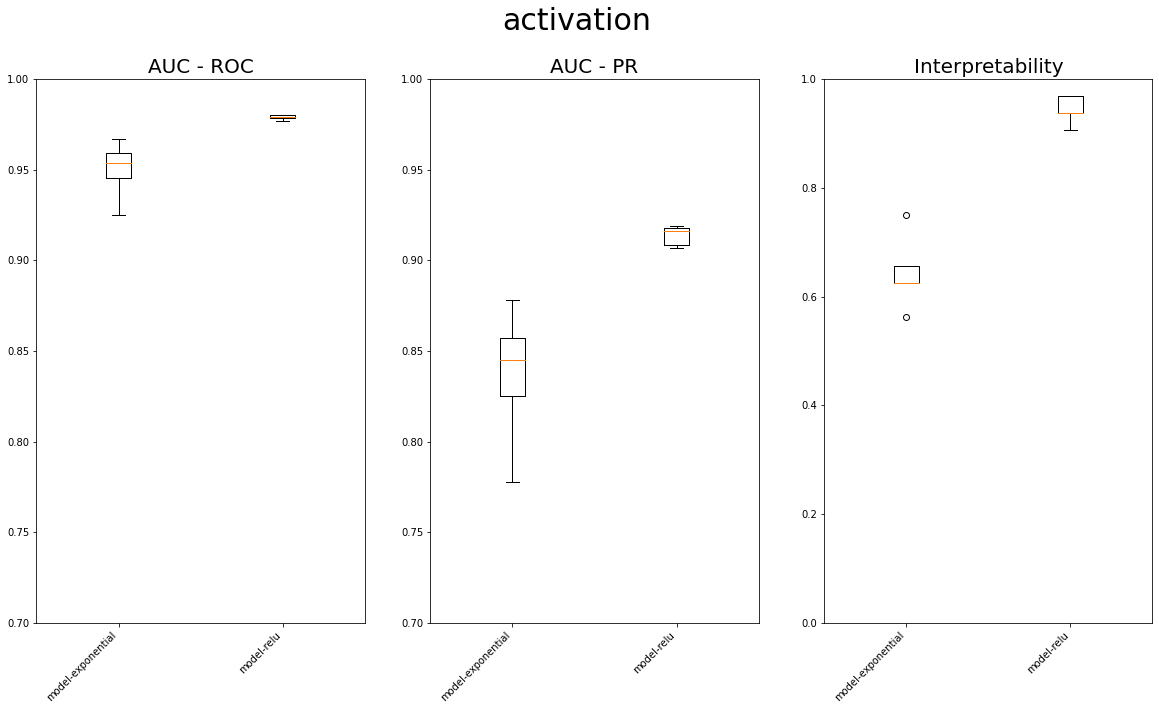

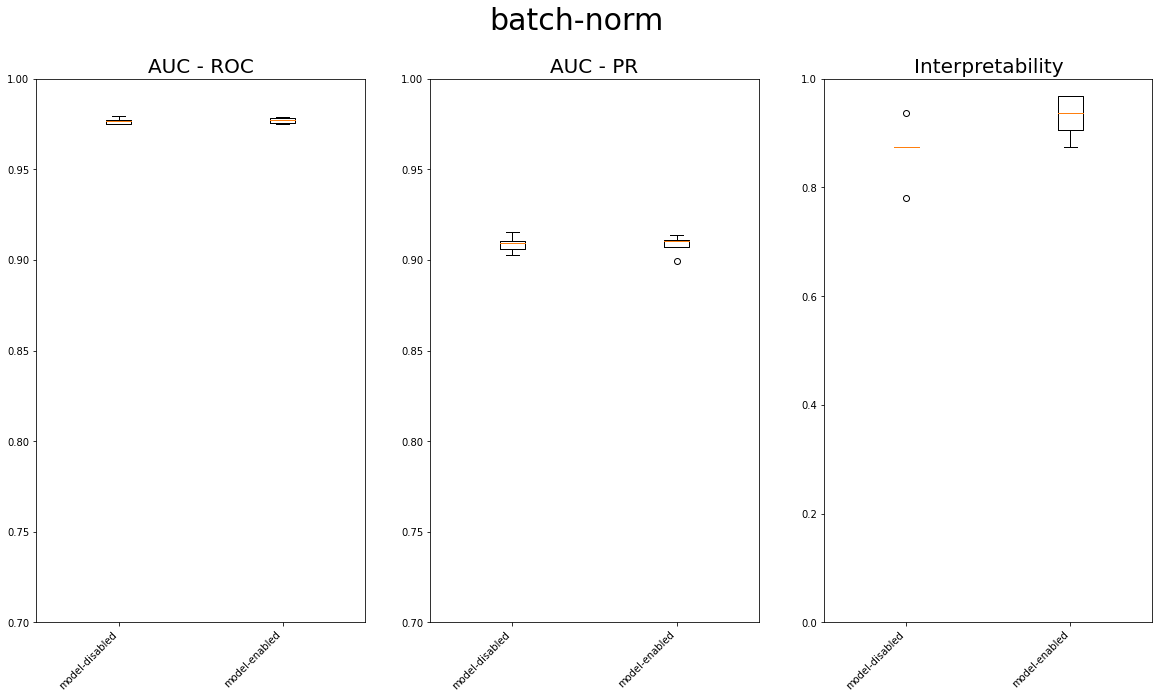

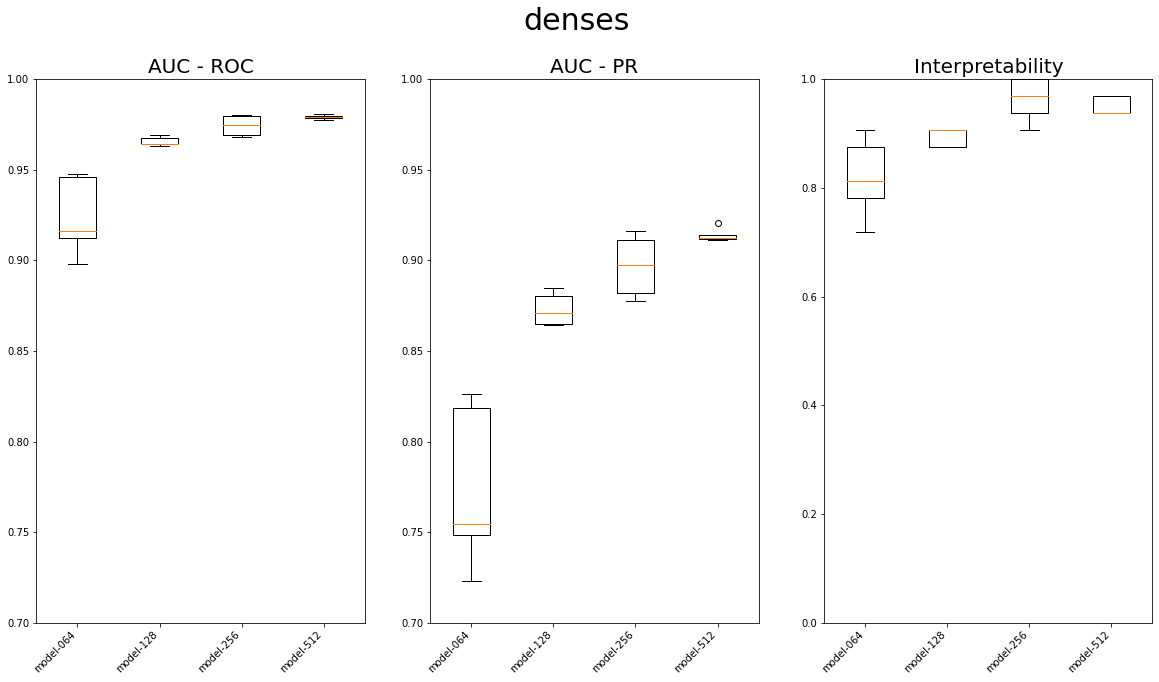

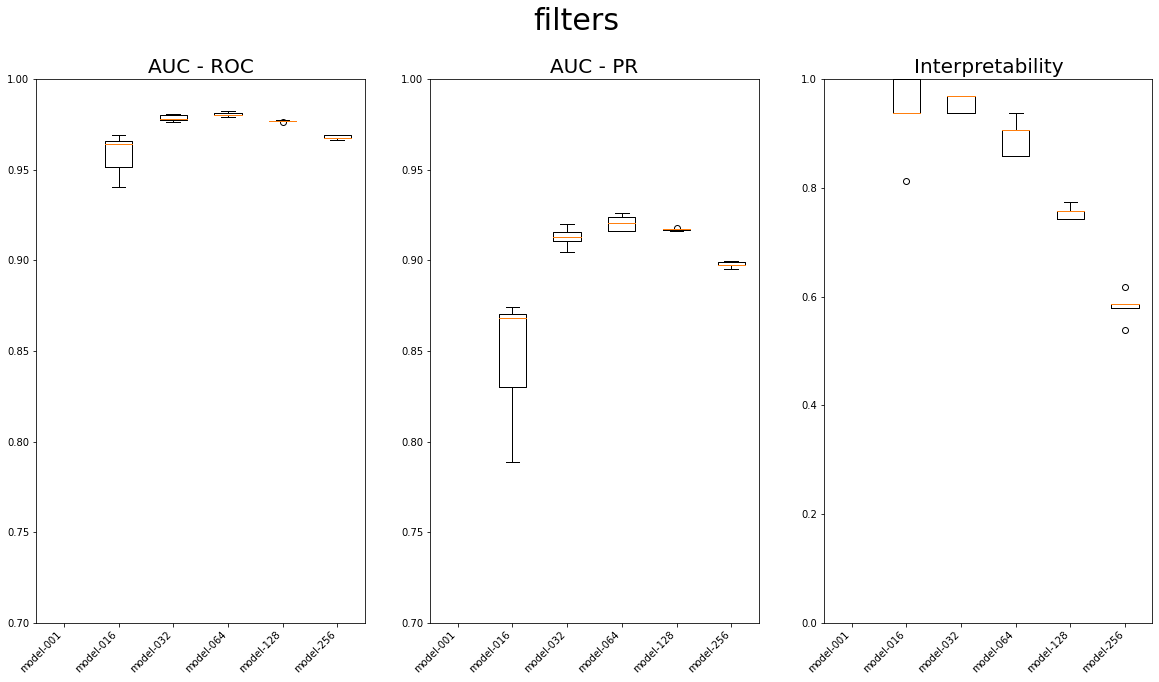

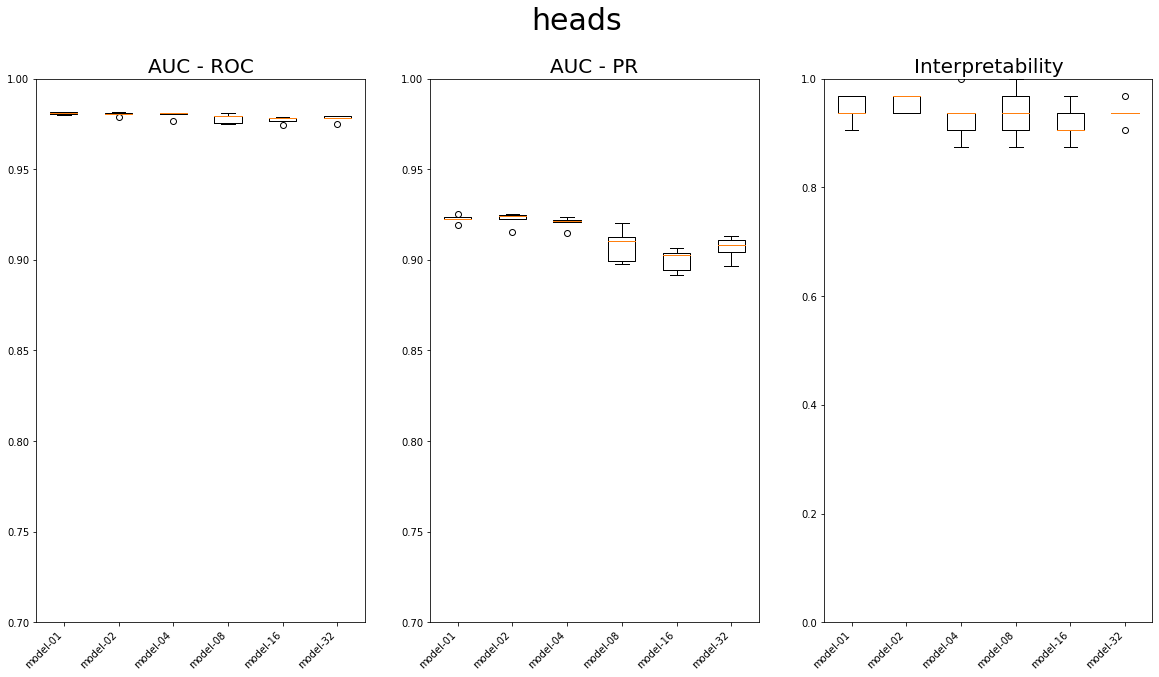

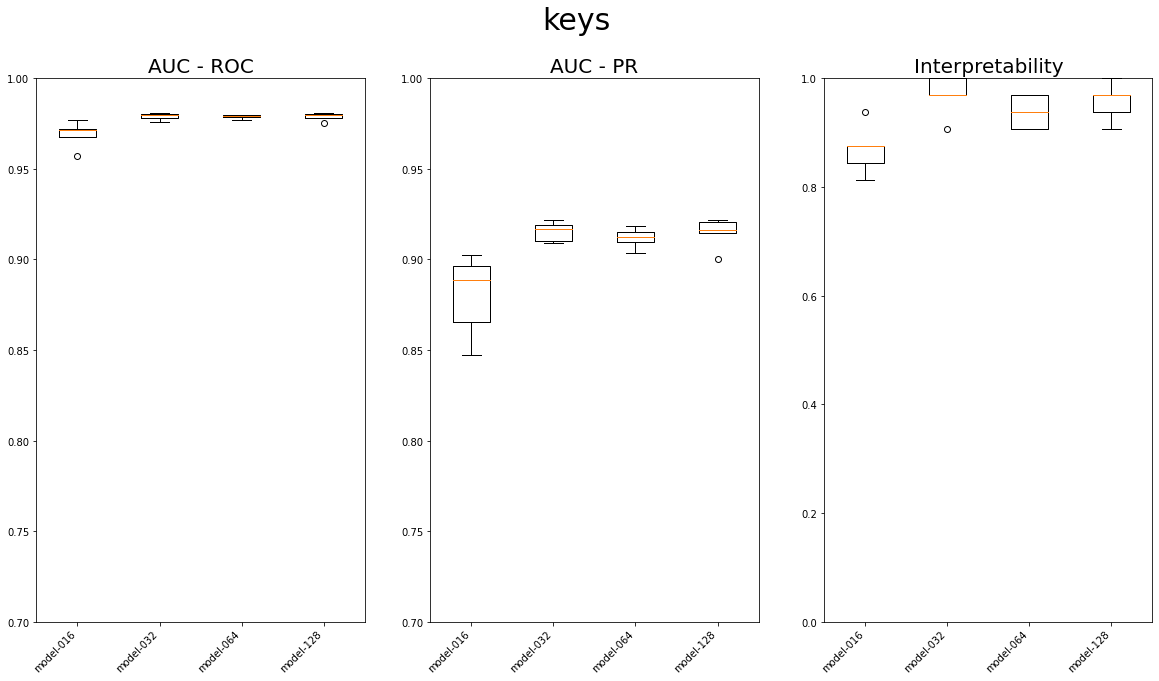

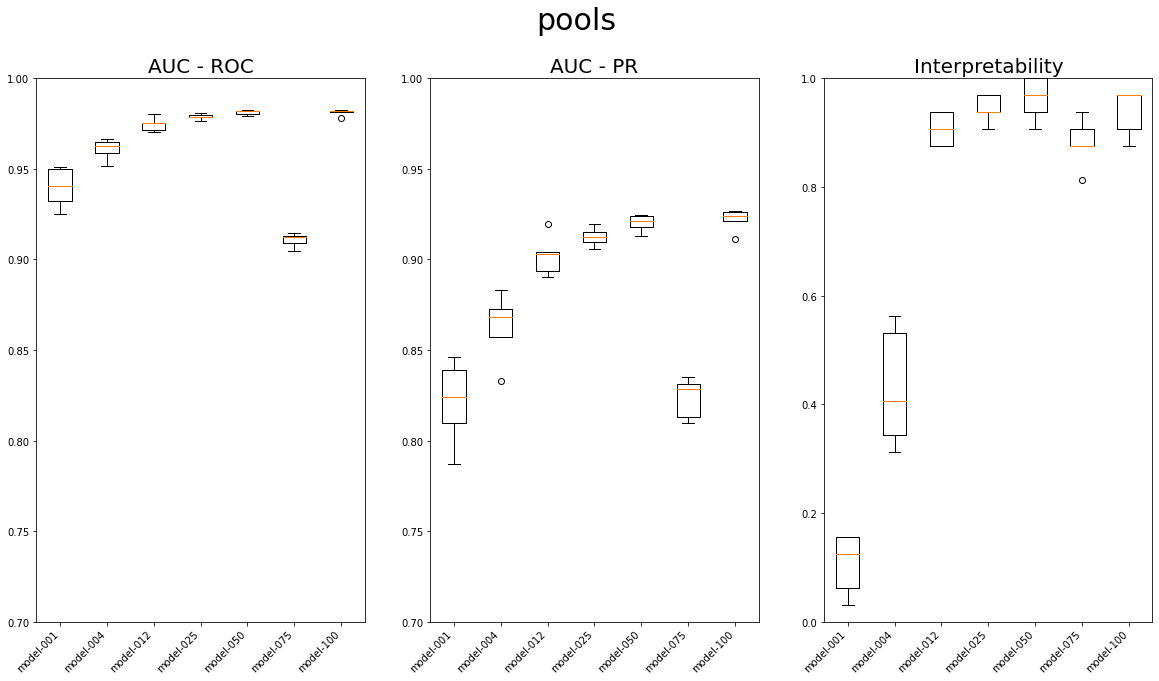

In [3]:
categories = [i for i in os.walk('statistics')][0][1]
categories.sort()
for x in range(len(categories)):
    plot_statistics(categories[x])